In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils import *

#### Ben' spseudo code 
%First, calcualte the best fit a model could ever do.

rss=sum((betas_train - betas_test).^2);

%Next, calculate the residual if we explained NO variance

variance=sum((betas_test-mean(betas_test)).^2);

ve_test=1-rss/variance


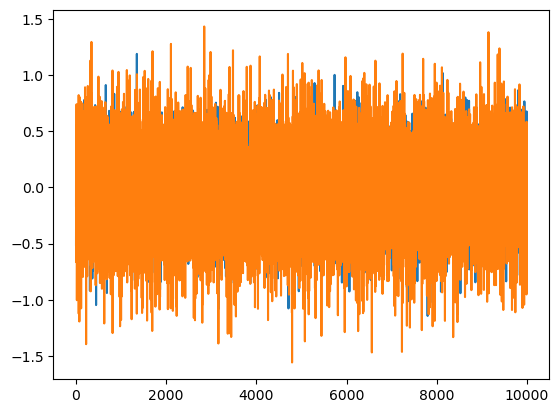

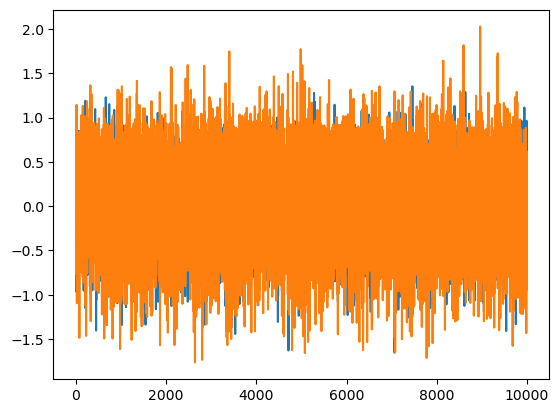

(14184, 10000)
(14184, 7092)


In [ ]:
best_variance = np.zeros((len(subj_list), len(rois.keys())))
for i, subj in enumerate(subj_list):
    train_path = os.path.join(betas_dir, f'{subj}_betas_list_nativesurface_train.npy')
    test_path = os.path.join(betas_dir, f'{subj}_betas_list_nativesurface_test.npy')
    betas_mask = np.load(os.path.join(betas_dir, f'{subj}_betas_list_nativesurface_train_test_mask.npy'), allow_pickle=True)
    if subj == 'subj06' or subj == 'subj08':
        roi_mask = os.path.join(mask_dir, subj, f'short.reduced.nans.{subj}.testrois.npy')
    else:
        roi_mask = os.path.join(mask_dir, subj, f'short.reduced.{subj}.testrois.npy')
    betas_train = np.load(train_path, allow_pickle=True)
    betas_test = np.load(test_path, allow_pickle=True)
    mask = np.load(roi_mask, allow_pickle=True)
    betas_train = betas_train[:,betas_mask]
    plt.plot(np.mean(betas_train, axis=0))
    plt.plot(np.mean(betas_test, axis=0))
    plt.show()
    for j, roi in enumerate(rois.keys()):

        plt.plot(np.mean(betas_train[mask == j+1], axis=0))  #show the mean for each condition
        plt.plot(np.mean(betas_test[mask == j+1], axis=0))
        plt.show()
        #X=cat(betas_train_rescale, ones(size(betas_train_rescale)))\n",
    #      scale = pinv(X)*betas_test[mask == j+1]; #pseudoinverse\n",
    #      betas_train_rescale= X @ scale;\n",
        betas_train_rescale=betas_train[mask == j+1]
    
        X = np.concatenate((betas_train_rescale, np.ones((betas_train_rescale.shape[0], betas_train_rescale.shape[1]))), axis=0)# should be something by 10000, concat on the x axis (right?) 
        print(X.shape) 
       # print(np.linalg.pinv(X).shape)
        scale = np.matmul(np.linalg.pinv(X).T, betas_test[mask == j+1].T) #pseudoinverse
        print(scale.shape)
        betas_train_rescale = X.T @ scale  # After checking in matlab, seems like that's the way??????

        plt.plot(np.mean(betas_train_rescale, axis=0))
        plt.plot(np.mean(betas_test[mask == j+1], axis=0))
        plt.show()   # doesnt seem to change much but maybe im showing the wrong thing 
        
        rss = np.sum((betas_train_rescale.T - betas_test[mask == j+1])**2)
        
# allow residual to scale 
    
    
       # best_variance[i, j] = np.mean(rss)

        variance = np.sum((betas_test[mask == j+1] - np.mean(betas_test[mask == j+1]))**2) 
        ve_test = 1-rss/variance  # Is it the inverse? or absolute value? We just want the difference 
        
  
        best_variance[i, j] = ve_test
print(best_variance)            

In [45]:
a = np.random.rand(60, 100)
b = np.random.rand(60, 100)
X = np.concatenate((a, np.ones((a.shape[0], a.shape[1]))), axis=0)
print(X.shape)
X_pinv = np.linalg.pinv(X)
print(X_pinv.shape)
scale = np.matmul(X_pinv.T, b.T)
print(scale.shape)
a_new = X.T @ scale
a_new.T

(120, 100)
(100, 120)
(120, 60)


array([[0.72790126, 0.43347782, 0.66483167, ..., 0.33132734, 0.43170804,
        0.48699229],
       [0.20570277, 0.61251736, 0.72504706, ..., 0.78957997, 0.39626624,
        0.64287069],
       [0.51767025, 0.5379055 , 0.38987412, ..., 0.74296967, 0.43413641,
        0.77673505],
       ...,
       [0.37831883, 0.70104537, 0.5972697 , ..., 0.24576925, 0.46316277,
        0.49830149],
       [0.36252835, 0.28338721, 0.48809014, ..., 0.25679583, 0.53933657,
        0.35961121],
       [0.47243711, 0.23852496, 0.51716226, ..., 0.37299145, 0.82184596,
        0.3352026 ]])

In [50]:
best_variance_df = pd.DataFrame(best_variance, columns=rois.keys(), index=subj_list)
best_variance_df

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,0.782493,0.766110,0.643851,0.383201,0.332009,0.255609,0.222361,0.215128,0.276103,0.298362,0.393126,0.309150
subj02,0.782457,0.733120,0.645634,0.391854,0.326095,0.251770,0.279826,0.308204,0.319454,0.341390,0.399088,0.342713
subj03,1.000000,1.000000,0.785731,0.362484,0.492652,0.424629,0.282987,0.367880,0.341064,0.430729,0.465091,0.302563
subj04,0.861672,0.950213,0.799416,0.458550,0.292253,0.289487,0.377004,0.349513,0.374343,0.399430,0.467412,0.329035
subj05,0.679352,0.632853,0.511674,0.334328,0.319439,0.223852,0.307109,0.298682,0.246517,0.341911,0.268480,0.289959
subj06,0.983833,0.930137,0.925018,0.416415,0.457779,0.565508,0.463010,0.403805,0.464453,0.671666,0.347158,0.245913
subj07,0.635428,0.566071,0.453330,0.218486,0.230530,0.199557,0.145874,0.172419,0.204149,0.259282,0.255209,0.222287
subj08,0.956957,1.000000,0.838385,0.470431,0.449648,0.488183,0.515316,0.388173,0.348388,0.443194,0.277787,0.277420


In [51]:
models_subs = {}
models = ['oself']
columns = ["x0", "y0", "sigma", "slope", "intercept", "test_var_explained", "var_explained", "mds_ecc", "mds_ang", "roi", "fit_with"]
model_study = 'oself'
mode = "train"
rotated = True

for i, sub in enumerate(subj_list):
    models_subs[sub] = {}
    for m in models:
        if rotated:
            m_file = os.path.join(models_dir, f'best_fits_{m}_{sub}_{mode}_basevoxel_rotated.npy')
        models_subs[sub][m] = pd.DataFrame(np.load(m_file, allow_pickle=True), columns=columns)
        models_subs[sub][m][columns[:-2]] = models_subs[sub][m][columns[:-2]].astype(np.float32)
        
variance = np.zeros((len(subj_list), len(rois.keys())))
m = models[0]
for i, sub in enumerate(subj_list):
    for j, roi in enumerate(rois.keys()):
        variance[i, j] = models_subs[sub][m].groupby('roi')['test_var_explained'].mean()[roi]

var_df = pd.DataFrame(variance, index=subj_list, columns=rois.keys())
var_df

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,0.020061,0.024599,0.028102,0.006704,0.006038,0.001205,-0.000504,0.045602,0.004255,0.019947,0.112967,0.031360
subj02,0.052120,0.013884,0.023750,0.000542,0.005357,-0.004125,0.001707,0.046504,0.028635,0.019667,0.077120,0.003169
subj03,-0.009582,-0.001906,-0.014460,-0.008087,0.005737,-0.007017,0.011596,0.033603,-0.011710,0.003969,0.070339,0.010125
subj04,0.023780,0.007202,0.004065,-0.007424,-0.009167,-0.018012,-0.013945,0.017712,0.000777,-0.004043,0.031522,0.005109
subj05,0.013025,0.010748,0.007668,-0.001056,0.002531,0.007741,0.045138,0.083541,0.004914,0.021058,0.041287,0.071646
subj06,0.012192,0.011738,0.005183,-0.004300,-0.000517,0.003039,-0.016918,0.010041,0.006544,0.033192,0.066874,0.005053
subj07,-0.001341,-0.010841,-0.014084,-0.022722,0.004575,-0.011937,-0.007484,-0.008730,-0.065581,0.007143,0.003994,-0.001561
subj08,0.002348,-0.002088,0.001091,-0.000202,-0.003080,-0.003358,0.001176,0.014636,-0.018498,0.011219,0.009713,-0.004543


In [52]:
percentage_variance_df = (var_df/best_variance_df) * 100
percentage_variance_df

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,2.563680,3.210930,4.364667,1.749480,1.818752,0.471574,-0.226796,21.197646,1.541143,6.685576,28.735644,10.143951
subj02,6.661131,1.893764,3.678584,0.138246,1.642742,-1.638249,0.609863,15.088752,8.963680,5.760754,19.323988,0.924590
subj03,-0.958237,-0.190600,-1.840337,-2.230920,1.164425,-1.652539,4.097603,9.134152,-3.433445,0.921419,15.123740,3.346454
subj04,2.759705,0.757908,0.508443,-1.619026,-3.136502,-6.222203,-3.698958,5.067761,0.207533,-1.012126,6.743926,1.552830
subj05,1.917204,1.698301,1.498527,-0.315943,0.792392,3.457882,14.697844,27.969795,1.993459,6.158786,15.378163,24.709077
subj06,1.239246,1.262012,0.560327,-1.032509,-0.112831,0.537313,-3.654010,2.486691,1.408915,4.941773,19.263304,2.054977
subj07,-0.211013,-1.915144,-3.106795,-10.399685,1.984658,-5.981930,-5.130696,-5.063079,-32.124143,2.754721,1.564935,-0.702324
subj08,0.245403,-0.208835,0.130154,-0.042900,-0.685064,-0.687901,0.228287,3.770497,-5.309580,2.531371,3.496585,-1.637509
